# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

***useful information for predicting survival (the target variable)***

# Load Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

**Display and Explore the dataset**

In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
null_values = data[data['Age'].isnull()]
print(null_values)

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

# Preprocessing

In [ ]:
## Dropping unnecessary columns
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

## Handling missing values

data['Age'].fillna(data['Age'].median(), inplace=True) # The median is used instead of the mean because it is less sensitive to outliers, and it helps to maintain the distribution of the data. The inplace=True argument modifies the DataFrame in place.
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) # This fills the missing values in the 'Embarked' column with the most frequent value (mode).

## Encoding categorical features
le = LabelEncoder() # convert categorical variables into numerical format (require in decision trees or neural networks).
data['Sex'] = le.fit_transform(data['Sex']) # 0 represents 'male', and 1 represents 'female'
data['Embarked'] = le.fit_transform(data['Embarked'])

## Splitting features and target
X = data.drop(columns=['Survived']) # X represents the input variables (features) for the model. 'Survived' is excluded because it’s the target variable (what the model needs to predict)
y = data['Survived'] # y will be the output of the model, the variable we want to predict.

## Standardizing the data
scaler = StandardScaler() # standardize the features by removing the mean and scaling to unit variance
X = scaler.fit_transform(X) # It computes the mean and standard deviation of each feature and then scales each feature to have a mean of 0 and a standard deviation of 1.

## Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Converting data to PyTorch tensors
# PyTorch tensors, which are the data structure used in PyTorch for efficient computation on the GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# .values converts the pandas Series into a numpy array (since PyTorch does not work directly with pandas Series).
# .unsqueeze(1) adds an additional dimension, which is necessary because the model expects targets to be in a 2D format (for binary classification, it expects a column vector).
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

<ipython-input-9-6d04cc419309>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True) # The median is used instead of the mean because it is less sensitive to outliers, and it helps to maintain the distribution of the data. The inplace=True argument modifies the DataFrame in place.
<ipython-input-9-6d04cc419309>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3

# Model Definition

In [ ]:
# you Can Change the # of layers or the # of Unit
# and try to use another Activation Funcition

class TitanicModel(nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.layer_1 = nn.Linear(X_train.shape[1], 16) # IL
        self.layer_2 = nn.Linear(16, 8) # HLvatio
        self.output = nn.Linear(8, 1) # OL
        self.sigmoid = nn.Sigmoid() # AF

    def forward(self, x):
        x = torch.relu(self.layer_1(x)) # add non-linearity
        x = torch.relu(self.layer_2(x))
        x = self.sigmoid(self.output(x)) # map the output between 0 and 1, which is needed for binary classification
        return x

class TitanicModelVariant1(nn.Module):
    def __init__(self):
        super(TitanicModelVariant1, self).__init__()
        self.layer_1 = nn.Linear(X_train.shape[1], 32)
        self.layer_2 = nn.Linear(32, 16)
        self.layer_3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        x = torch.relu(self.layer_3(x))
        x = self.sigmoid(self.output(x))
        return x

class TitanicModelVariant2(nn.Module):
    def __init__(self):
        super(TitanicModelVariant2, self).__init__()
        self.layer_1 = nn.Linear(X_train.shape[1], 16)
        self.layer_2 = nn.Linear(16, 16)
        self.layer_3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        x = torch.relu(self.layer_3(x))
        x = self.sigmoid(self.output(x))
        return x


# Initialize Models, Loss Function, and Optimizer

In [ ]:
## Model Initialization
model = TitanicModel() # instance of the TitanicModel class (a simple 2-layer model)
model_variant1 = TitanicModelVariant1() # instance of the TitanicModelVariant1 class (a 3-layer model with larger first hidden layer).
model_variant2 = TitanicModelVariant2() # instance of the TitanicModelVariant2 class (a 3-layer model where the second hidden layer has the same number of units as the first).

## Loss Function
# BCELoss measures the difference between the predicted probability (between 0 and 1) and the actual target (either 0 or 1). The goal is to minimize this loss during training, helping the model make accurate predictions.
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer_variant1 = optim.Adam(model_variant1.parameters(), lr=0.001)
optimizer_variant2 = optim.Adam(model_variant2.parameters(), lr=0.001)

# Training Function

In [ ]:
# Define number of epochs
epochs = 100

def train_model(model, optimizer, epochs):
    #  Metrics Initialization
    losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()

        # Forward pass for training data
        y_pred_train = model(X_train_tensor)
        train_loss = criterion(y_pred_train, y_train_tensor) # criterion (Binary Cross-Entropy Loss in this case)

        # Backward pass and optimization
        optimizer.zero_grad() # Clears the gradients from the previous step
        train_loss.backward() # Computes the gradient of the loss with respect parameters
        optimizer.step() # Updates the model parameters using the computed gradients

        losses.append(train_loss.item())

    # Evaluate on test data
        model.eval() # Sets the model to evaluation mode, disabling certain features like dropout.
        with torch.no_grad(): # no gradients are calculate
            y_pred_test = model(X_test_tensor)
            test_loss = criterion(y_pred_test, y_test_tensor).item() # criterion (Binary Cross-Entropy Loss in this case)
            test_losses.append(test_loss)

            # Calculate accuracies for training
            y_pred_train_binary = (y_pred_train > 0.5).float() # Converts the predicted probabilities into binary predictions (0 or 1) using a threshold of 0.5.
            train_accuracy = (y_pred_train_binary.eq(y_train_tensor).sum() / y_train_tensor.shape[0]).item()
            train_accuracies.append(train_accuracy * 100)
           # Calculate accuracies for testing
            y_pred_test_binary = (y_pred_test > 0.5).float()
            test_accuracy = (y_pred_test_binary.eq(y_test_tensor).sum() / y_test_tensor.shape[0]).item()
            test_accuracies.append(test_accuracy * 100)

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss:.4f}, "
                  f"Train Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")

    return losses, test_losses, train_accuracies, test_accuracies

# Train all models

In [ ]:
print("Training Default Model")
losses, test_losses, train_accuracies, test_accuracies = train_model(model, optimizer, epochs)

print("\nTraining Variant 1 Model")
losses_variant1, test_losses_variant1, train_accuracies_variant1, test_accuracies_variant1 = train_model(model_variant1, optimizer_variant1, epochs)

print("\nTraining Variant 2 Model")
losses_variant2, test_losses_variant2, train_accuracies_variant2, test_accuracies_variant2 = train_model(model_variant2, optimizer_variant2, epochs)

Training Default Model
Epoch 10/100, Train Loss: 0.6863, Test Loss: 0.6913, Train Accuracy: 62.36%, Test Accuracy: 58.66%
Epoch 20/100, Train Loss: 0.6784, Test Loss: 0.6845, Train Accuracy: 62.36%, Test Accuracy: 58.66%
Epoch 30/100, Train Loss: 0.6718, Test Loss: 0.6785, Train Accuracy: 62.36%, Test Accuracy: 58.66%
Epoch 40/100, Train Loss: 0.6657, Test Loss: 0.6728, Train Accuracy: 62.36%, Test Accuracy: 58.66%
Epoch 50/100, Train Loss: 0.6585, Test Loss: 0.6655, Train Accuracy: 62.36%, Test Accuracy: 58.66%
Epoch 60/100, Train Loss: 0.6490, Test Loss: 0.6555, Train Accuracy: 62.50%, Test Accuracy: 58.66%
Epoch 70/100, Train Loss: 0.6360, Test Loss: 0.6421, Train Accuracy: 63.34%, Test Accuracy: 60.34%
Epoch 80/100, Train Loss: 0.6197, Test Loss: 0.6251, Train Accuracy: 66.01%, Test Accuracy: 67.04%
Epoch 90/100, Train Loss: 0.6007, Test Loss: 0.6047, Train Accuracy: 70.22%, Test Accuracy: 70.39%
Epoch 100/100, Train Loss: 0.5796, Test Loss: 0.5812, Train Accuracy: 73.17%, Test Acc

# Visualization

**Plotting the loss curves for all models**

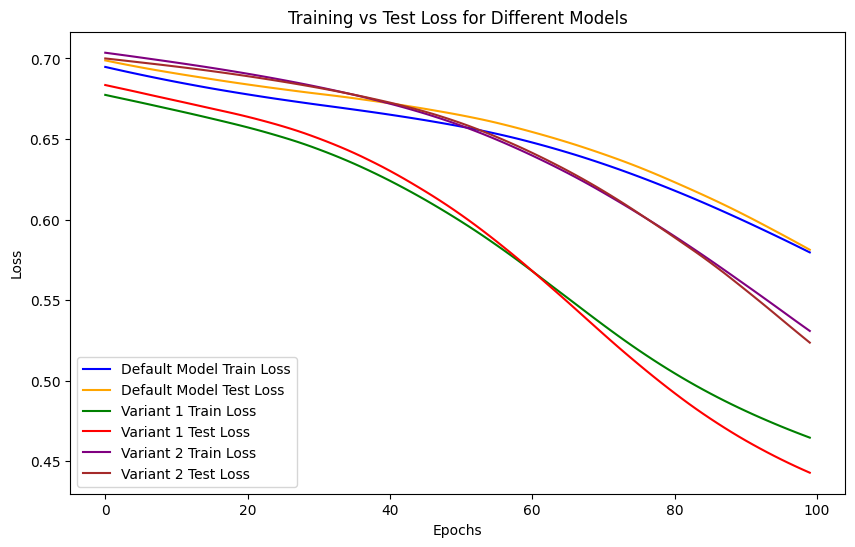

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label='Default Model Train Loss', color='blue')
plt.plot(range(epochs), test_losses, label='Default Model Test Loss', color='orange')
plt.plot(range(epochs), losses_variant1, label='Variant 1 Train Loss', color='green')
plt.plot(range(epochs), test_losses_variant1, label='Variant 1 Test Loss', color='red')
plt.plot(range(epochs), losses_variant2, label='Variant 2 Train Loss', color='purple')
plt.plot(range(epochs), test_losses_variant2, label='Variant 2 Test Loss', color='brown')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Test Loss for Different Models')
plt.legend()
plt.show()

**Plotting accuracy curves for all models**

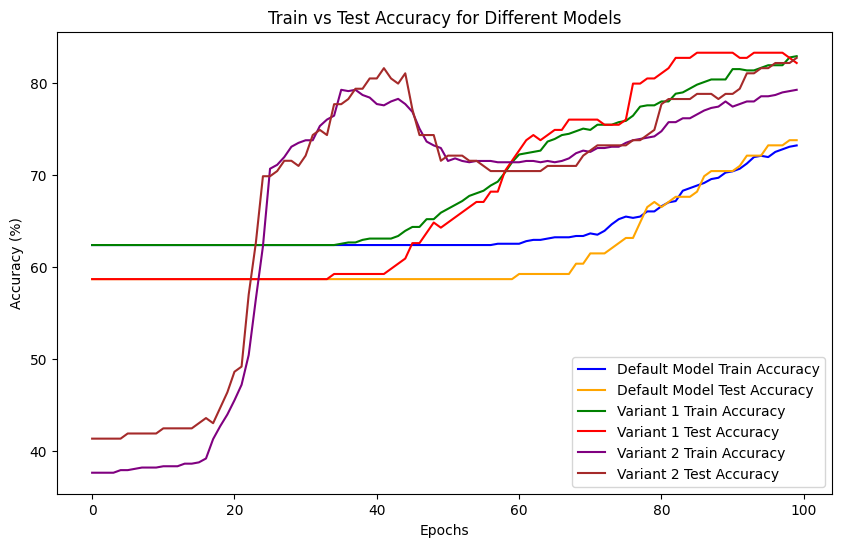

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_accuracies, label='Default Model Train Accuracy', color='blue')
plt.plot(range(epochs), test_accuracies, label='Default Model Test Accuracy', color='orange')
plt.plot(range(epochs), train_accuracies_variant1, label='Variant 1 Train Accuracy', color='green')
plt.plot(range(epochs), test_accuracies_variant1, label='Variant 1 Test Accuracy', color='red')
plt.plot(range(epochs), train_accuracies_variant2, label='Variant 2 Train Accuracy', color='purple')
plt.plot(range(epochs), test_accuracies_variant2, label='Variant 2 Test Accuracy', color='brown')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy for Different Models')
plt.legend()
plt.show()